In [1]:
%matplotlib inline

# Tarea 6: Reducción de Dimensiones: Datos de tejido canceroso

Tecnológico de Costa Rica<br/>
Aprendizaje Automático <br/>


Cuaderno base para realizar la sección de la tarea 6 relacionada con la identificación de tejido canceroso.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Cargar datos de tejido canceroso

Los datos quedarán almacenados en X y las etiquetas en y

In [3]:
archivo_csv = 'cancer.csv' 

col_label = 1 ## Columna en el CSV con las etiquetas 'B'enigno o 'M'aligno
col_feats = 2 ## Columna en el CSV a partir de la cual se encuentran las características

horizontal=12  ## Tamaño de las figuras
figsize=(horizontal,horizontal/(16/9))

Cargar todos los datos en archivo csv

In [4]:
## Es necesario manejar manualmente la conversión del caracter en la 1era columna a número
converters={}
for i in range(32):
    converters[i] = lambda x : float(x)
converters[col_label] =  lambda x : 1.0 if (x==b'M') else 0.0

data = np.genfromtxt(archivo_csv, delimiter=',',skip_header=1,converters=converters)
print("Datos completos en matriz {0} x {1}".format(data.shape[0],data.shape[1]))

Datos completos en matriz 569 x 32


In [5]:
# La columna col_labels tiene las etiquetas
y=data[:,col_label].ravel()
print("Label shape:",y.shape)

# La columna col_grupos tiene los grupos
X=data[:,col_feats:32]
print("Data shape :",X.shape)


Label shape: (569,)
Data shape : (569, 30)


### Normalización de los datos

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print("X normalized",X_normalized)

X normalized [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

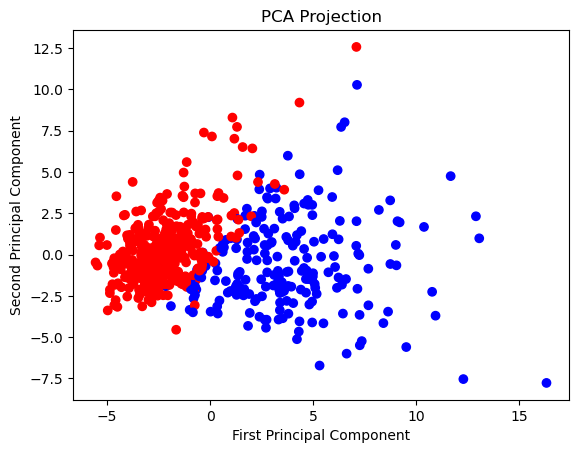

In [10]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection')

plt.show()

In [11]:
# Visualizar los dos primeros componentes principales
print('Primer componente principal:', pca.components_[0])
print('Segundo componente principal:', pca.components_[1])

# Visualizar los eigenvalores de los dos primeros componentes principales
print('Eigenvalor del primer componente principal:', pca.explained_variance_[0])
print('Eigenvalor del segundo componente principal:', pca.explained_variance_[1])

Primer componente principal: [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
Segundo componente principal: [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]
Eigenvalor del primer componente principal: 13.304990794374573
Eigenvalor del segundo componente principal: 5.701374603726135


### Métodos de reducción de dimensiones (no supervisado):

## KPCA

In [12]:
from sklearn.decomposition import KernelPCA

In [13]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/100)
X_kpca = kpca.fit_transform(X_normalized)
print(X_kpca)

[[ 0.64242785  0.18549604]
 [ 0.30631396 -0.41560547]
 [ 0.64533348 -0.1294642 ]
 ...
 [ 0.16374648 -0.25497195]
 [ 0.70907121  0.16515992]
 [-0.37057486  0.00159553]]


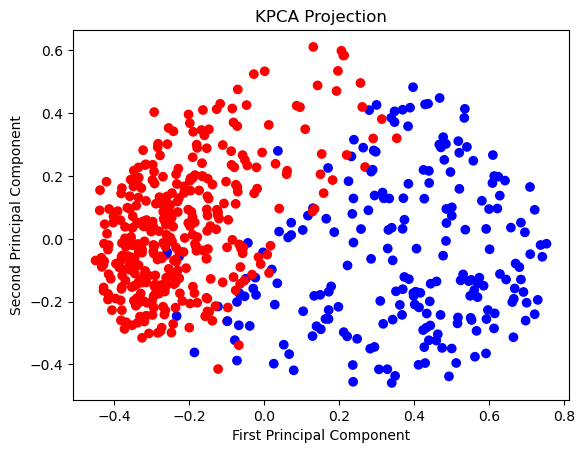

In [14]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KPCA Projection')
plt.show()

# ISOMAP

In [15]:
from sklearn.manifold import Isomap

In [16]:
isomap = Isomap(n_components=2)

isomap.fit(X_normalized)

X_isomap = isomap.transform(X_normalized)

print(X_isomap)

[[18.68631676 -1.11216213]
 [ 7.61830864 -4.43248499]
 [12.75025732 -2.86735301]
 ...
 [ 1.74619449 -3.6403823 ]
 [17.24982371  1.37031912]
 [-8.82185652 -5.10804389]]


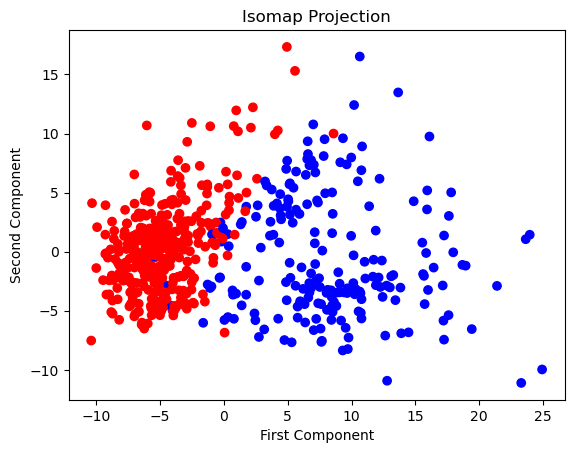

In [17]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Isomap Projection')

plt.show()

### Métodos de reducción de dimensiones (supervisado):

# PLS

In [18]:
from sklearn.cross_decomposition import PLSRegression

In [19]:
# Linear Discriminant Analysis (LDA)
pls = PLSRegression(n_components=2)
X_pls = pls.fit_transform(X_normalized, y)[0]

# print the transformed data
print("LDA transformed data:")
print(X_pls)

LDA transformed data:
[[ 8.58231845  2.63041941]
 [ 2.89579184 -2.14615361]
 [ 5.80534387 -0.50808951]
 ...
 [ 1.52247787 -1.16266418]
 [10.19611015 -0.04309317]
 [-5.27294149 -0.72193978]]


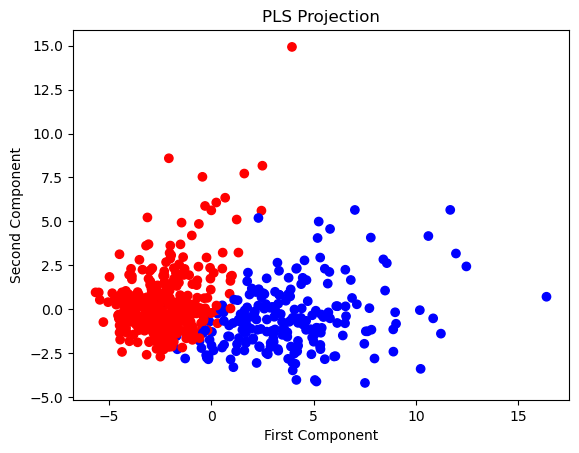

In [20]:


colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pls[:, 0], X_pls[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PLS Projection')

plt.show()

# UMAP

In [21]:
import umap

C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
reducer = umap.UMAP(n_components=2)
X_umap = reducer.fit_transform(X_normalized, y)

# print the transformed data
print("UMAP transformed data:")
print(X_umap)

UMAP transformed data:
[[-6.3196692 20.80635  ]
 [-7.846668  19.991852 ]
 [-6.692574  20.584938 ]
 ...
 [-8.289244  19.343172 ]
 [-6.2858367 20.754318 ]
 [16.007786  20.512138 ]]


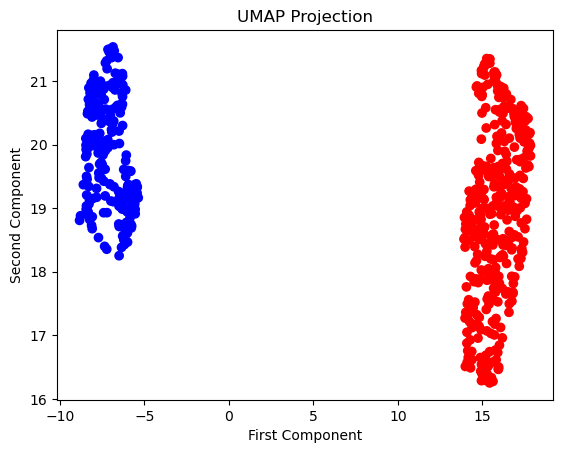

In [23]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('UMAP Projection')

plt.show()

# PaCMAP

In [24]:
import pacmap

In [25]:
# PaCMAP
reducer = pacmap.PaCMAP(n_components =2)
X_pacmap = reducer.fit_transform(X_normalized)

# print the transformed data
print("PaCMAP transformed data:")
print(X_pacmap)

PaCMAP transformed data:
[[ 6.4422727  2.7217348]
 [ 7.318413  -1.6417068]
 [ 6.72389    1.0485224]
 ...
 [ 6.2999616 -3.1774838]
 [ 6.641136   2.472643 ]
 [-6.295285   2.0176628]]


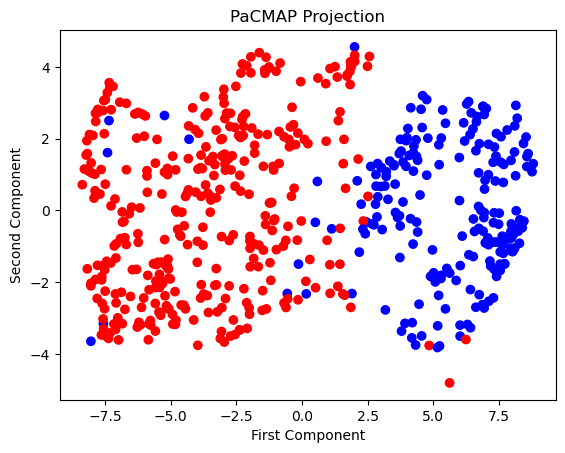

In [26]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pacmap[:, 0], X_pacmap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PaCMAP Projection')

plt.show()

### Aglomeración 

## K-means

In [27]:
from sklearn.cluster import KMeans

In [28]:
def find_clusters(X, k, random_state=0):
    # create an instance of the KMeans class
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    
    # fit the data
    kmeans.fit(X)
    
    # get the cluster assignments
    clusters = kmeans.predict(X)
    
    return clusters

In [29]:
clusters = find_clusters(X_normalized, 2)

# print the cluster assignments
print("Cluster assignments:")
print(clusters)

Cluster assignments:
[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0

C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


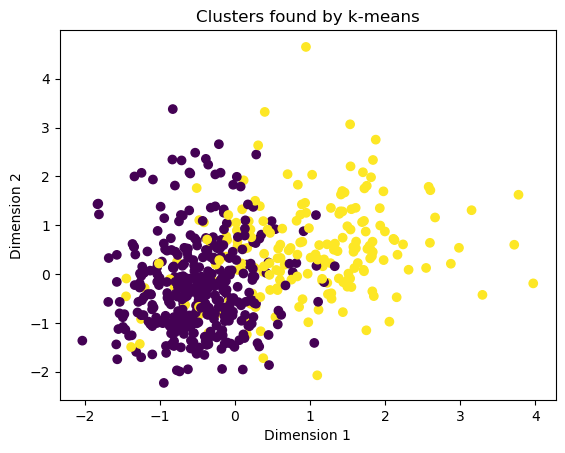

In [30]:
# create a scatter plot of the first two dimensions of the data
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=clusters, cmap='viridis')

# add axis labels
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# add a title
plt.title('Clusters found by k-means')

# show the plot
plt.show()

# Gaussian Mixture

In [31]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import os
os.environ['OMP_NUM_THREADS'] = '2'


In [32]:
def generative_classifier(X_train, y_train, X_test):
    # Find the unique classes
    classes = np.unique(y_train)
    
    # Initialize list to store the Gaussian Mixture models for each class
    gmms = []
    
    # Iterate over each class
    for c in classes:
        # Get the data for the current class
        X_train_c = X_train[y_train == c]
        
        # Fit a Gaussian Mixture model to the data
        gmm = GaussianMixture(n_components=1)
        gmm.fit(X_train_c)
        
        # Append the fitted model to the list
        gmms.append(gmm)
    
    # Initialize list to store the predicted probabilities for each class
    y_probs = []
    
    # Iterate over each class
    for gmm in gmms:
        # Predict the probability of each test instance belonging to the current class
        y_prob_c = gmm.score_samples(X_test)
        
        # Append the predicted probabilities to the list
        y_probs.append(y_prob_c)
    
    # Convert list of predicted probabilities to a numpy array
    y_probs = np.array(y_probs).T
    
    # Predict the class with the highest probability for each test instance
    y_pred = classes[np.argmax(y_probs, axis=1)]
    
    return y_pred

In [33]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Normalize the training data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_train)

# Use the generative_classifier function to predict the class labels for the test data
y_pred = generative_classifier(X_normalized, y_train, X_test)

# Calculate the accuracy of the predictions
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.37


C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:

def select_gmm(X_train, y_train, max_components=10):
    # Find the unique classes
    classes = np.unique(y_train)
    
    # Initialize list to store the selected Gaussian Mixture models for each class
    gmms = []
    
    # Iterate over each class
    for c in classes:
        # Get the data for the current class
        X_train_c = X_train[y_train == c]
        
        # Initialize list to store the AIC values for different numbers of components
        aics = []
        
        # Iterate over different numbers of components
        for n_components in range(1, max_components + 1):
            # Fit a Gaussian Mixture model to the data
            gmm = GaussianMixture(n_components=n_components)
            gmm.fit(X_train_c)
            
            # Calculate the AIC value for the current model
            aic = gmm.aic(X_train_c)
            
            # Append the AIC value to the list
            aics.append(aic)
        
        # Find the number of components with the lowest AIC value
        best_n_components = np.argmin(aics) + 1
        
        # Fit a Gaussian Mixture model with the selected number of components to the data
        best_gmm = GaussianMixture(n_components=best_n_components)
        best_gmm.fit(X_train_c)
        
        # Append the selected model to the list
        gmms.append(best_gmm)
    
    return gmms

In [35]:
gmms = select_gmm(X_normalized, y_train)

# Initialize list to store the predicted probabilities for each class
y_probs = []

# Iterate over each class
for gmm in gmms:
    # Predict the probability of each test instance belonging to the current class
    y_prob_c = gmm.score_samples(X_test)
    
    # Append the predicted probabilities to the list
    y_probs.append(y_prob_c)

# Convert list of predicted probabilities to a numpy array
y_probs = np.array(y_probs).T

# Predict the class with the highest probability for each test instance
y_pred = np.argmax(y_probs, axis=1)

# Calculate the accuracy of the predictions
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

Accuracy: 0.37


C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 2),
    "covariance_type": ["spherical", "tied"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X_normalized)

C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied'],
                         'n_components': range(1, 2)},
             scoring=<function gmm_bic_score at 0x000001F7C2D83B50>)

In [59]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
1,1,tied,4249.282021
0,1,spherical,7407.672560


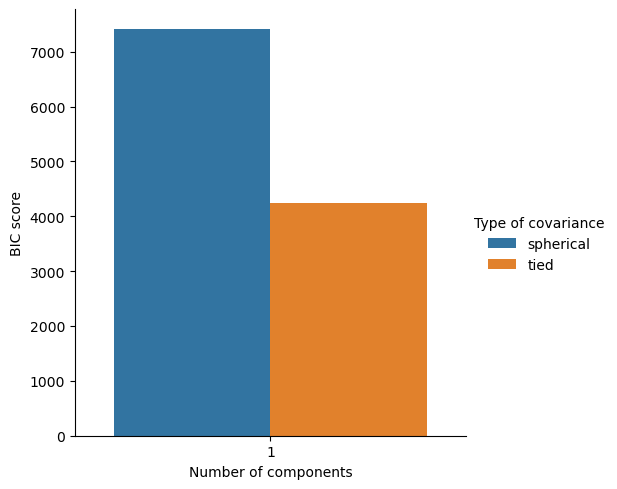

In [60]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

ValueError: expected square "a" matrix

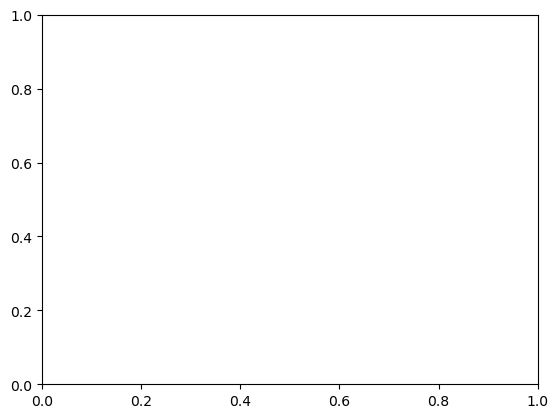

In [61]:
from matplotlib.patches import Ellipse
from scipy import linalg

color_iter = sns.color_palette("tab10", 2)[::-1]
Y_ = grid_search.predict(X_normalized)

fig, ax = plt.subplots()

for i, (mean, cov, color) in enumerate(
    zip(
        grid_search.best_estimator_.means_,
        grid_search.best_estimator_.covariances_,
        color_iter,
    )
):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_normalized[Y_ == i, 0], X_normalized[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    f"Selected GMM: {grid_search.best_params_['covariance_type']} model, "
    f"{grid_search.best_params_['n_components']} components"
)
plt.axis("equal")
plt.show()

# Akaike Information Criterion (AIC)

In [40]:
def select_gmm_aic(X_train, y_train, max_components=10):
    # Find the unique classes
    classes = np.unique(y_train)
    
    # Initialize list to store the selected Gaussian Mixture models for each class
    gmms = []
    
    # Iterate over each class
    for c in classes:
        # Get the data for the current class
        X_train_c = X_train[y_train == c]
        
        # Initialize list to store the AIC values for different numbers of components
        aics = []
        
        # Iterate over different numbers of components
        for n_components in range(1, max_components + 1):
            # Fit a Gaussian Mixture model to the data
            gmm = GaussianMixture(n_components=n_components)
            gmm.fit(X_train_c)
            
            # Calculate the AIC value for the current model
            aic = gmm.aic(X_train_c)
            
            # Append the AIC value to the list
            aics.append(aic)
        
        # Find the number of components with the lowest AIC value
        best_n_components = np.argmin(aics) + 1
        
        # Fit a Gaussian Mixture model with the selected number of components to the data
        best_gmm = GaussianMixture(n_components=best_n_components)
        best_gmm.fit(X_train_c)
        
        # Append the selected model to the list
        gmms.append(best_gmm)
    
    return gmms

In [41]:
# Use the select_gmm_aic function to select a Gaussian Mixture model for each class
gmms = select_gmm_aic(X_normalized, y_train)

# Initialize list to store the predicted probabilities for each class
y_probs = []

# Iterate over each class
for gmm in gmms:
    # Predict the probability of each test instance belonging to the current class
    y_prob_c = gmm.score_samples(X_test)
    
    # Append the predicted probabilities to the list
    y_probs.append(y_prob_c)

# Convert list of predicted probabilities to a numpy array
y_probs = np.array(y_probs).T

# Predict the class with the highest probability for each test instance
y_pred = np.argmax(y_probs, axis=1)

# Calculate the accuracy of the predictions
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

Accuracy: 0.66


C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

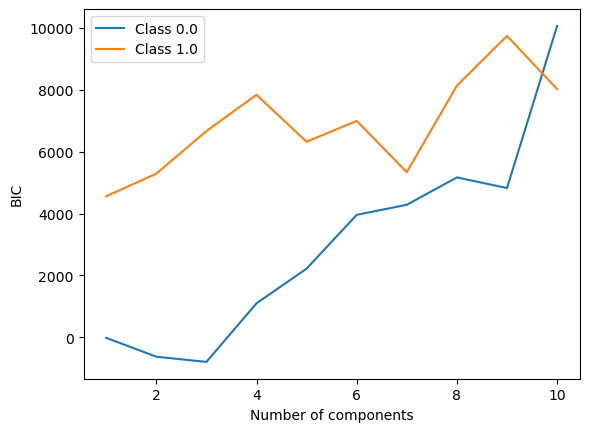

In [42]:
# Find the unique classes
classes = np.unique(y_train)

# Set the maximum number of components to consider
max_components = 10

# Initialize list to store the BIC values for each class
all_bics = []

# Iterate over each class
for c in classes:
    # Get the data for the current class
    X_train_c = X_normalized[y_train == c]
    
    # Initialize list to store the BIC values for different numbers of components
    bics = []
    
    # Iterate over different numbers of components
    for n_components in range(1, max_components + 1):
        # Fit a Gaussian Mixture model to the data
        gmm = GaussianMixture(n_components=n_components)
        gmm.fit(X_train_c)
        
        # Calculate the BIC value for the current model
        bic = gmm.bic(X_train_c)
        
        # Append the BIC value to the list
        bics.append(bic)
    
    # Append the BIC values for the current class to the list
    all_bics.append(bics)

# Plot the BIC values for each class
for c, bics in zip(classes, all_bics):
    plt.plot(range(1, max_components + 1), bics, label=f'Class {c}')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.legend()
plt.show()

In [53]:
# Use the select_gmm function to select a Gaussian Mixture model for each class
gmms = select_gmm(X_umap, y_train)

# Plot the data and the best model for each class
for c, gmm in zip(np.unique(y_train), gmms):
    # Get the data for the current class
    X_train_c = X_normalized[y_train == c]
    
    # Plot the data for the current class
    plt.scatter(X_train_c[:, 0], X_train_c[:, 1], label=f'Class {c}')
    
    # Plot the best model for the current class
    x = np.linspace(-2, 2)
    y = np.linspace(-2, 2)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(X.shape)
    plt.contour(X, Y, Z)
plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 569 but corresponding boolean dimension is 426

In [52]:
X_normalized.shape


(426, 30)